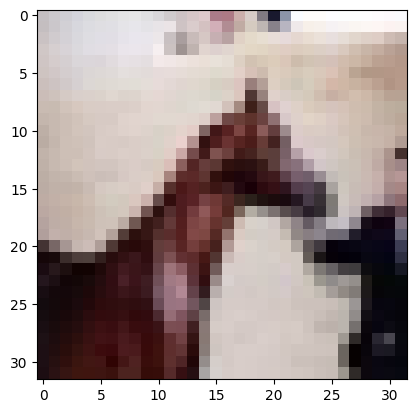

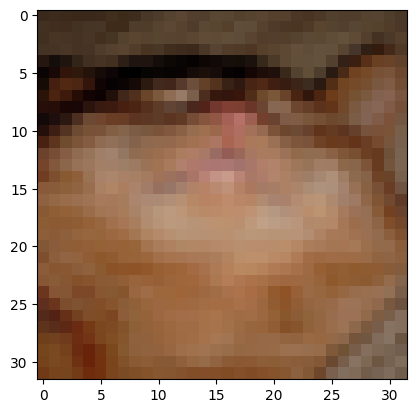

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
37/37 [==============================] - 174s 5s/step - loss: 2.3328 - accuracy: 0.1405 - val_loss: 2.2166 - val_accuracy: 0.1882
Epoch 2/5
37/37 [==============================] - 170s 5s/step - loss: 2.1443 - accuracy: 0.2230 - val_loss: 2.0477 - val_accuracy: 0.2780
Epoch 3/5
37/37 [==============================] - 174s 5s/step - loss: 1.9855 - accuracy: 0.2937 - val_loss: 1.9167 - val_accuracy: 0.3203
Epoch 4/5
37/37 [==============================] - 168s 5s/step - loss: 1.8850 - accuracy: 0.3358 - val_loss: 1.8339 - val_accuracy: 0.3558
Epoch 5/5
313/313 [==============================] - 19s 61ms/step
Accuracy score is 37.87 %


In [2]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
nc = 10 # Number of classes


(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()



#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain[0:20000,:] / 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain[0:20000], depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


history = model.fit(Xtrain, ytrainEnc, epochs=5, batch_size=550,validation_data=(Xtest, ytestEnc))


ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

In [3]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X,y,idx):
  plt.figure(figsize=(15,2))
  plt.imshow(X[idx])
  plt.xlabel(classes[y[idx]])

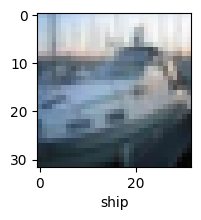

In [6]:
plot_sample(Xtest,ytest,2)

**As able to view, this model is not able to predict the images correctly, so we have to increase the number of epochs**

In [ ]:
model.fit(Xtrain, ytrainEnc, epochs=10, batch_size=550,validation_data=(Xtest, ytestEnc))

Epoch 1/10
37/37 [==============================] - 175s 5s/step - loss: 1.7508 - accuracy: 0.3794 - val_loss: 1.6989 - val_accuracy: 0.4006
Epoch 2/10
37/37 [==============================] - 170s 5s/step - loss: 1.6807 - accuracy: 0.4030 - val_loss: 1.6500 - val_accuracy: 0.4138
Epoch 3/10
37/37 [==============================] - 171s 5s/step - loss: 1.6495 - accuracy: 0.4081 - val_loss: 1.6214 - val_accuracy: 0.4211
Epoch 4/10
37/37 [==============================] - 171s 5s/step - loss: 1.6108 - accuracy: 0.4256 - val_loss: 1.6084 - val_accuracy: 0.4285
Epoch 5/10
37/37 [==============================] - 171s 5s/step - loss: 1.5759 - accuracy: 0.4388 - val_loss: 1.5731 - val_accuracy: 0.4344
Epoch 6/10
37/37 [==============================] - 168s 5s/step - loss: 1.5456 - accuracy: 0.4479 - val_loss: 1.5514 - val_accuracy: 0.4437
Epoch 7/10
37/37 [==============================] - 165s 4s/step - loss: 1.5101 - accuracy: 0.4564 - val_loss: 1.5183 - val_accuracy: 0.4506
Epoch 8/10
37